In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [6]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [7]:
df.shape

(29922, 6)

In [8]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [9]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: drop if duplicated or null

In [10]:
df[df.duplicated()].shape[0]

538

In [11]:
df.isnull().sum()

order_id         0
name          1488
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [12]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
6,10002,NaN,2018-01-01 12:23:09,$3.00,3,$9.00
27,10007,NaN,2018-01-01 15:03:17,$2.50,1,$2.50
77,10026,NaN,2018-01-02 03:25:40,$0.50,2,$1.00
88,10031,NaN,2018-01-02 05:45:48,$3.50,3,$10.50


#### Sanity check for value ranges and to check assumptions

In [15]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

19924

In [17]:
# df[df['line_total'] < 0].shape[0]
df['line_total'] = pd.to_numeric(df['line_total'], errors='coerce')


#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [18]:
df.describe()

,order_id,quantity,line_total
count,29922.000000,29922.000000,0.0
mean,14992.538701,2.002105,NaN
std,2889.466576,0.819225,NaN
min,10000.000000,1.000000,NaN
25%,12498.000000,1.000000,NaN
50%,14972.000000,2.000000,NaN
75%,17506.750000,3.000000,NaN
max,19999.000000,3.000000,NaN


#### TODO: Get value between "" in name and put it in category column

In [19]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,NaN
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,NaN
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,NaN
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,NaN
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,NaN


#### Analysis, finally!

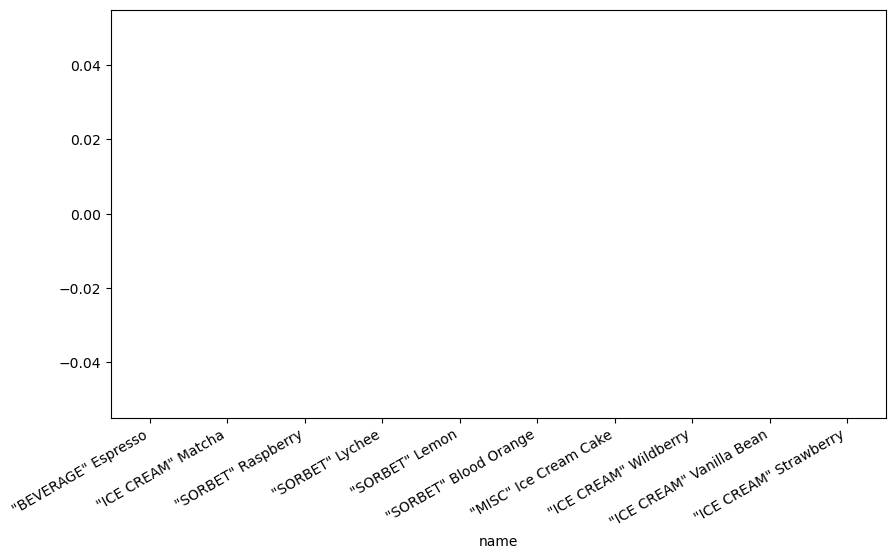

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()

In [22]:
df = pd.read_csv('sales.csv')

In [23]:
print(df.dtypes)

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object


In [25]:
df['col1'] = df['order_id'].astype(int)

In [26]:
print(df.dtypes)

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
col1           int32
dtype: object


In [27]:
df['col1'] = pd.to_numeric(df['col1'], errors='coerce')

In [28]:
print(df.dtypes)

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
col1           int32
dtype: object


In [29]:
df = pd.read_csv('sales.csv')

In [30]:
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50
...,...,...,...,...,...,...
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,$-1.50,2,$-3.00
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,$4.00,3,$12.00
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,$3.50,3,$10.50
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,$3.50,2,$7.00


In [31]:
df = df.drop_duplicates()

In [32]:
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50
...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,$4.00,3,$12.00
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,$2.50,3,$7.50
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,$3.00,1,$3.00
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,$3.50,1,$3.50


In [33]:
df = df.dropna()

In [34]:
import re

In [38]:
df = pd.read_csv('sales.csv')

In [59]:
def extract_order_id(text):
    order_regex = r"ORDER-\d+" 
    order_ids = re.findall(order_regex, text) 
    if order_ids:
        return order_ids[0]
    else:
        return None 

In [47]:
print(df['order_id'].isna().sum())

0


In [48]:
df['order_id'] = df['order_id'].astype(int)

In [50]:
print(df['order_id'].unique())


[10000 10001 10002 ... 19997 19998 19999]


In [51]:
df = df.dropna(subset=['order_id'])


In [52]:
df['order_id'] = df['order_id'].fillna(0)


In [53]:
df['order_id'] = df['order_id'].astype(int)


In [55]:
df['order_id'] = df['order_id'].astype(str)

In [56]:
df['order_id'] = df['order_id'].apply(lambda x: extract_order_id(x))

In [57]:
print(df[df['order_id'].str.contains(r"ORDER-\d+", na=False)])


Empty DataFrame
Columns: [order_id, name, ordered_at, price, quantity, line_total]
Index: []


In [58]:
print(len(df))


29922
